In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.4.3'

In [5]:
train_data_path ="E:/New folder (2)/data/train"
validation_data_path ="E:/New folder (2)/data/val"

In [6]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [7]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels


Found 1951 images belonging to 4 classes.


training_data.class_indices


In [8]:
{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [9]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


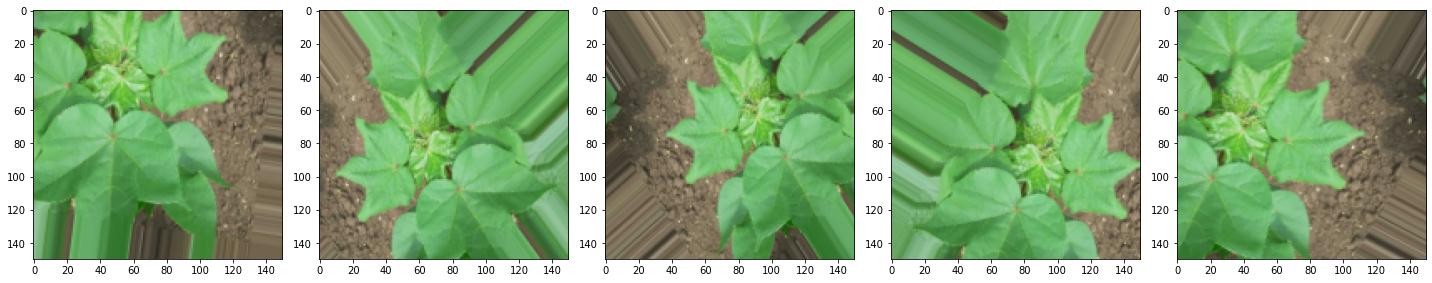

In [10]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [12]:
# save best model using vall accuracy
model_path = 'E:/New folder (2)/v4_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
61/61 [==============================] - 123s 2s/step - loss: 1.2928 - accuracy: 0.3943 - val_loss: 1.1121 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to E:/New folder (2)\v4_pred_cott_dis.h5
Epoch 2/500
61/61 [==============================] - 72s 1s/step - loss: 1.0970 - accuracy: 0.5105 - val_loss: 1.0115 - val_accuracy: 0.5895

Epoch 00002: val_accuracy improved from 0.50000 to 0.58951, saving model to E:/New folder (2)\v4_pred_cott_dis.h5
Epoch 3/500
61/61 [==============================] - 81s 1s/step - loss: 0.9707 - accuracy: 0.5755 - val_loss: 0.9173 - val_accuracy: 0.5833

Epoch 00003: val_accuracy did not improve from 0.58951
Epoch 4/500
61/61 [==============================] - 74s 1s/step - loss: 0.9139 - accuracy: 0.6371 - val_loss: 0.7562 - val_accuracy: 0.7006

Epoch 00004: val_accuracy improved from 0.58951 to 0.70062, saving model to E:/New folder (2)\v4_pred_cott_dis.h5
Epoch 5/500
61/61 [==================

In [ ]:
model_path2 = 'E:/New folder (2)/data/v4_1_pred_cott_dis.h5'
cnn_model.save(model_path2)